In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [38]:
#download data from kaggle : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
data =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.shape)
data.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
attribution={'Yes': 1, 'No':0}
data['Attrition'] =data['Attrition'].map(attribution)

In [41]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [42]:
(data.Attrition.value_counts()/len(data))*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [43]:
attrition = data[data['Attrition'] ==1]
not_attrition =data[data['Attrition']==0][:237]

In [44]:
dataset =pd.concat([attrition, not_attrition])


In [45]:
dataset.Attrition.value_counts()

1    237
0    237
Name: Attrition, dtype: int64

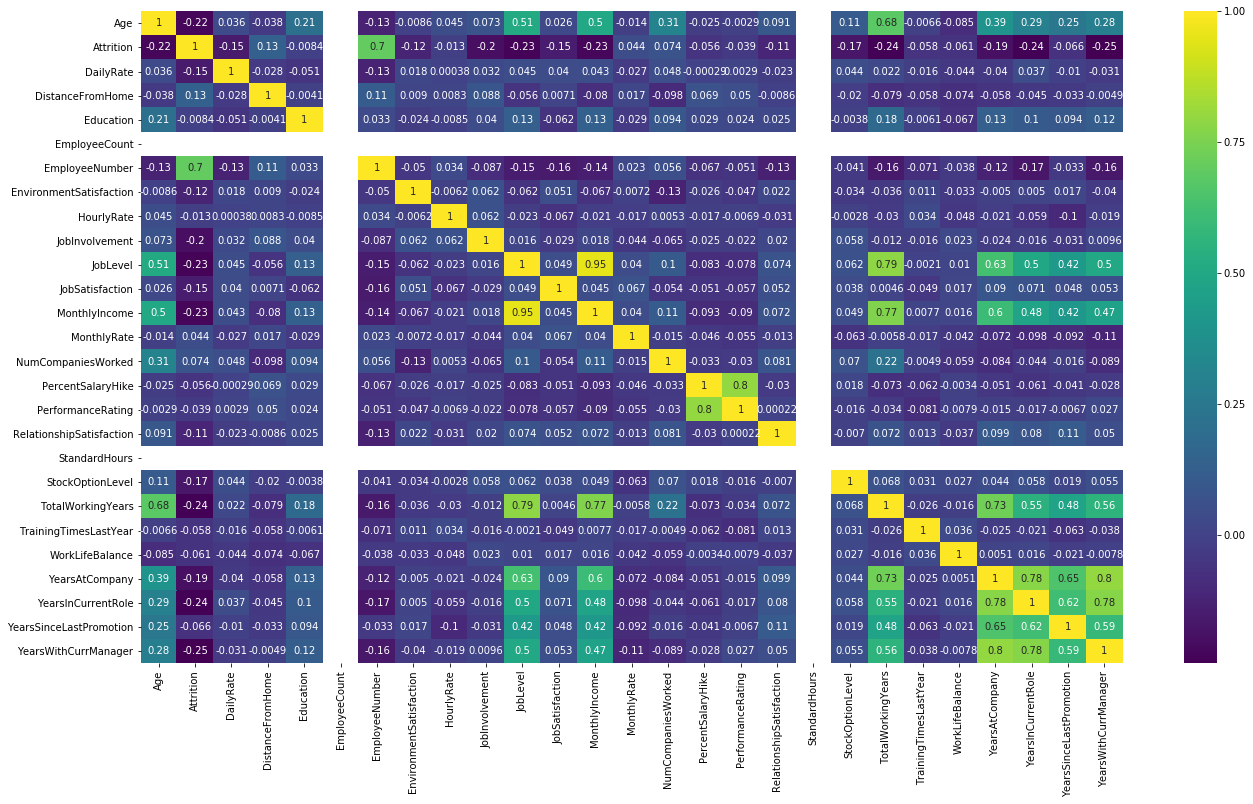

In [46]:
plt.figure(figsize=(22,12))
sns.heatmap(dataset.corr(), annot= True, cmap='viridis')

In [47]:
cat =[col for col in dataset.columns if dataset[col].dtype =='O']
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [50]:
num =[col for col in dataset.columns if dataset[col].dtype !='O']


In [48]:
#checking for null values
for col in dataset.columns:
    if dataset[col].isnull().sum() > 0:
        print(col, dataset[col].isnull().sum())

In [34]:
def enconde(var, target):
    order =dataset.groupby(var)[target].mean().to_dict()
    dataset[var]= dataset[var].map(order)

In [35]:
for col in cat:
    enconde(col, 'Attrition')

In [36]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Attrition', axis =1), dataset.Attrition, test_size =0.2, random_state =0)
X_train.shape, X_test.shape

((1176, 34), (294, 34))

In [37]:
X_train.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1.176000e+03,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,36.805272,0.160734,802.033163,0.161005,9.159864,2.918367,0.161326,1.0,1026.960034,2.750850,0.161364,65.130102,2.724490,2.055272,0.162009,2.732993,0.162245,6458.690476,14247.159864,2.703231,1.612245e-01,0.159550,15.152211,3.150510,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,9.065549,0.047423,405.946729,0.031421,8.137224,1.009809,0.038511,0.0,594.763609,1.096221,0.010806,20.294326,0.715027,1.106040,0.088721,1.102477,0.065743,4724.845883,7133.767499,2.521301,1.471671e-15,0.089719,3.652543,0.357723,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,18.000000,0.080000,104.000000,0.138398,1.000000,1.000000,0.134146,1.0,1.000000,1.000000,0.147959,30.000000,1.000000,1.000000,0.025000,1.000000,0.100917,1009.000000,2094.000000,0.000000,1.612245e-01,0.104364,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.149569,463.500000,0.138398,2.000000,2.000000,0.135776,1.0,498.750000,2.000000,0.147959,48.000000,2.000000,1.000000,0.068966,2.000000,0.124814,2858.750000,7912.750000,1.000000,1.612245e-01,0.104364,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.149569,805.500000,0.138398,7.000000,3.000000,0.146865,1.0,1031.000000,3.000000,0.170068,65.000000,3.000000,2.000000,0.160959,3.000000,0.124814,4850.500000,14225.500000,2.000000,1.612245e-01,0.104364,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,42.250000,0.149569,1162.000000,0.206278,14.000000,4.000000,0.146865,1.0,1555.250000,4.000000,0.170068,82.250000,3.000000,3.000000,0.230769,4.000000,0.255319,8380.250000,20372.500000,4.000000,1.612245e-01,0.305288,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,60.000000,0.249097,1499.000000,0.206278,29.000000,5.000000,0.259259,1.0,2068.000000,4.000000,0.170068,100.000000,4.000000,5.000000,0.397590,4.000000,0.255319,19999.000000,26999.000000,9.000000,1.612245e-01,0.305288,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [55]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [58]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

pred = xgb_model.predict(X_train)
print('train accuracy score :', accuracy_score(y_train, pred))

xgb_pred = xgb_model.predict(X_test)
print('train accuracy score :', accuracy_score(y_test, xgb_pred))

train accuracy score : 0.9464285714285714
train accuracy score : 0.8639455782312925


In [157]:
feature = pd.DataFrame({'feature': X_train.columns,'value' :xgb_model.feature_importances_})

top_features = feature.sort_values(by ='value', ascending =False).head(5)
top_features 

,feature,value
27,TotalWorkingYears,0.075178
21,OverTime,0.059294
26,StockOptionLevel,0.058377
33,YearsWithCurrManager,0.048308
0,Age,0.044121


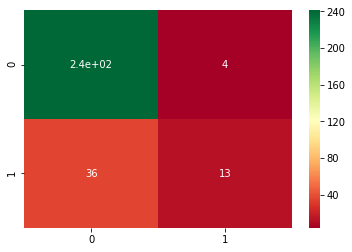

In [64]:
cn = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cn, annot= True, cmap='RdYlGn')

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


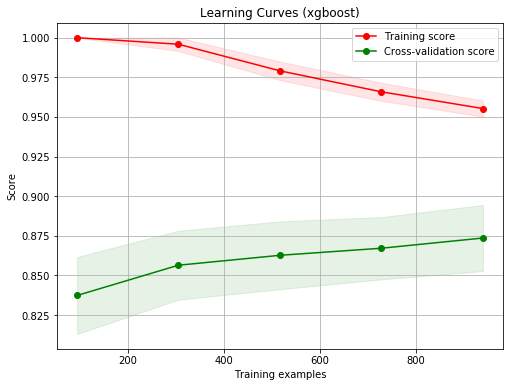

In [70]:
title = "Learning Curves (xgboost)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = xgb_model
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

pred = ada_model.predict(X_train)
print('train accuracy score :', accuracy_score(y_train, pred))

ada_pred = ada_model.predict(X_test)
print('train accuracy score :', accuracy_score(y_test, xgb_pred))

train accuracy score : 0.9132653061224489
train accuracy score : 0.8639455782312925


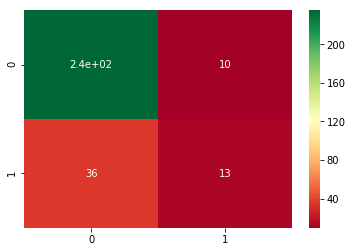

In [74]:
cn = confusion_matrix(y_test, ada_pred)
sns.heatmap(cn, annot= True, cmap='RdYlGn')

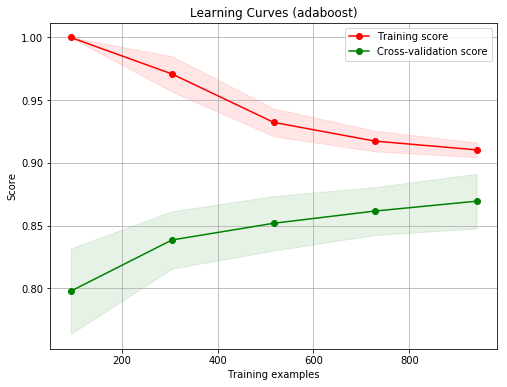

In [73]:
title = "Learning Curves (adaboost)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = ada_model
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scalled = sc.fit_transform(X_train)
X_test_scalled = sc.transform(X_test)